In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import matplotlib

In [4]:
import vice

import surp
from surp import subgiants

import arya
arya.style.set_size((10/3, 10/3))
from arya import COLORS

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [5]:
def find_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the csv summary
    """
    
    file_name = "../models/" + name + "/stars.csv"
    model =  pd.read_csv(file_name, index_col=0)
    return model

In [6]:
data_kwargs = dict(
    color="k", 
    stat="median",
    err_kwargs=dict(facecolor="k", alpha=0.3)
)

model_kwargs = dict(
    stat="median", errorbar=None,
    aes="line"
)


def zooh_models(models, labels,x="MG_H", y="C_MG", sequential=False, filt_ha=True, **kwargs):
    kwargs = dict(numbins=20, **kwargs)
    
    N = len(models)
    
    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end
        
    for i in range(N):
        name = labels[i]
        model = models[i]
        if filt_ha:
            df = surp.plots.filter_high_alpha(model)
        else:
            df = model
        color = hm(i)
            
        arya.medianplot(df, x=x + "_true", y=y+ "_true", label=name, color=color, **model_kwargs, **kwargs)
    # end

    if filt_ha:
        df = surp.plots.filter_high_alpha(subgiants)
    else:
        df = subgiants
        
    arya.medianplot(df, x=x, y=y, zorder=-2, **data_kwargs, **kwargs)
    
# end


    
def zofeo_models(models, labels, x="MG_FE", y="C_MG", sequential=False, mg_0=-0.1, w=0.05, **kwargs):
    kwargs = dict(numbins=12, x=x, y=y, **kwargs)
    df = surp.plots.filter_metallicity(subgiants,)

    arya.medianplot(df, **data_kwargs, **kwargs)
    
    N = len(models)
    kwargs["x"] = x + "_true"
    kwargs["y"] = y+ "_true"

    if sequential:
        hm = arya.HueMap(clim=(0, N))
    else:
        hm = lambda i: COLORS[i]
    # end    
    
    for i in range(N):
        model = models[i]
        df = surp.plots.filter_metallicity(model, c=mg_0, w=w)
        color = hm(i)

        arya.medianplot(df, label=labels[i], color=color, **model_kwargs, **kwargs)
    #end 
    

#

In [7]:
def names_to_models(names):
    return [find_model(name) for name in names]

In [8]:
def compare_cooh(names, labels, ylim=None, legend=True, **kwargs):
    models = names_to_models(names)
    zooh_models(models, labels,legend=legend, **kwargs)
    if legend:
        arya.Legend(color_only=True)
    plt.xlabel("[Mg/H]")
    plt.ylabel("[C/Mg]")
    
    if ylim is not None:
        plt.ylim(ylim)
    else:
        plt.ylim(-0.22, 0.04)
        plt.yticks(np.arange(-0.2, 0.02, 0.05))
    # end if
    
    plt.xlim(-0.45, 0.35)

In [9]:
def compare_coofe(names, labels, legend=True, ylim=None, **kwargs):
    models = names_to_models(names)
    zofeo_models(models, labels, legend=legend, **kwargs)
    if legend:
        arya.Legend(color_only=True)
    plt.xlabel("[Mg/Fe]")
    plt.ylabel("[C/Mg]")
    plt.xlim(0, 0.3)


In [10]:
def compare(names, labels, axs=None, **kwargs):
    if axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex="col", sharey=True,  gridspec_kw={"wspace": 0, "hspace": 0})
    # end
        
    plt.sca(axs[0])
    compare_cooh(names, labels, **kwargs, legend=False)
    
    plt.sca(axs[1])
    compare_coofe(names, labels, legend=False, **kwargs)
    arya.Legend(color_only=True)

# end


# Main figures

In [11]:
names = [    
    "C11_f0.2",
    "V13_f0.2",
    "K16_f0.2",
    "P16_f0.2",
    "A_f0.2_zeta_agb-0.1_t_d0.15_tau_agb0.5"
  ]
models = names_to_models(names)
labels = ["C11", "V13", "K16",  "P16", "A"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


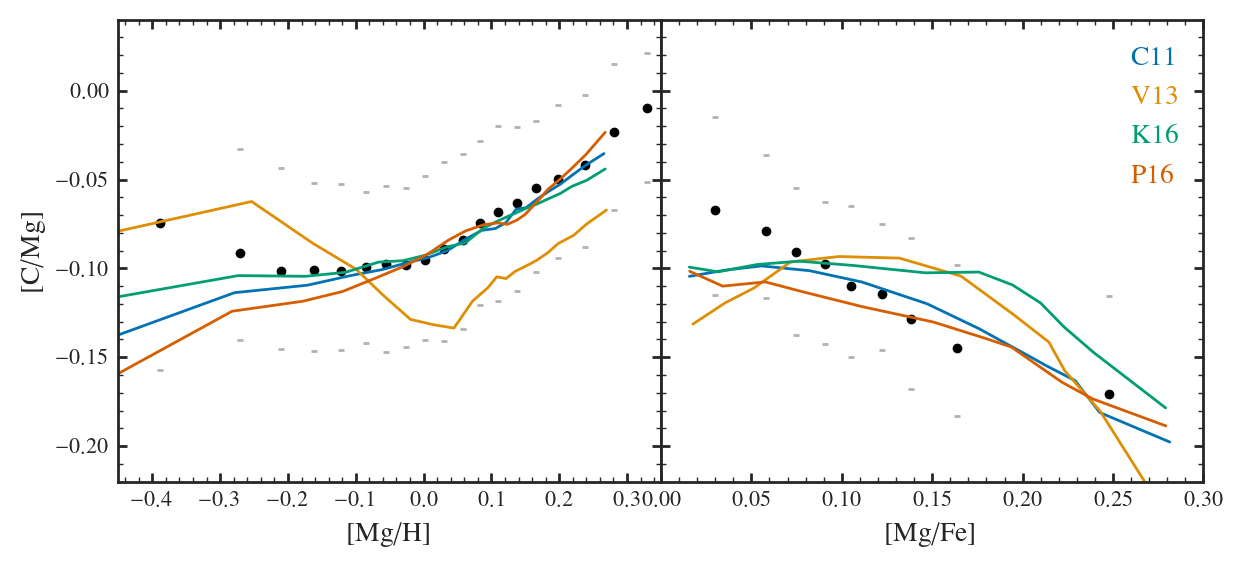

In [26]:
names = [    
    "C11_f0.2",
    "V13_f0.2",
    "K16_f0.2",
    "P16_f0.2",
  ]

labels = ["C11", "V13", "K16",  "P16"]

compare(names, labels)
plt.savefig("figures/sims_agb.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


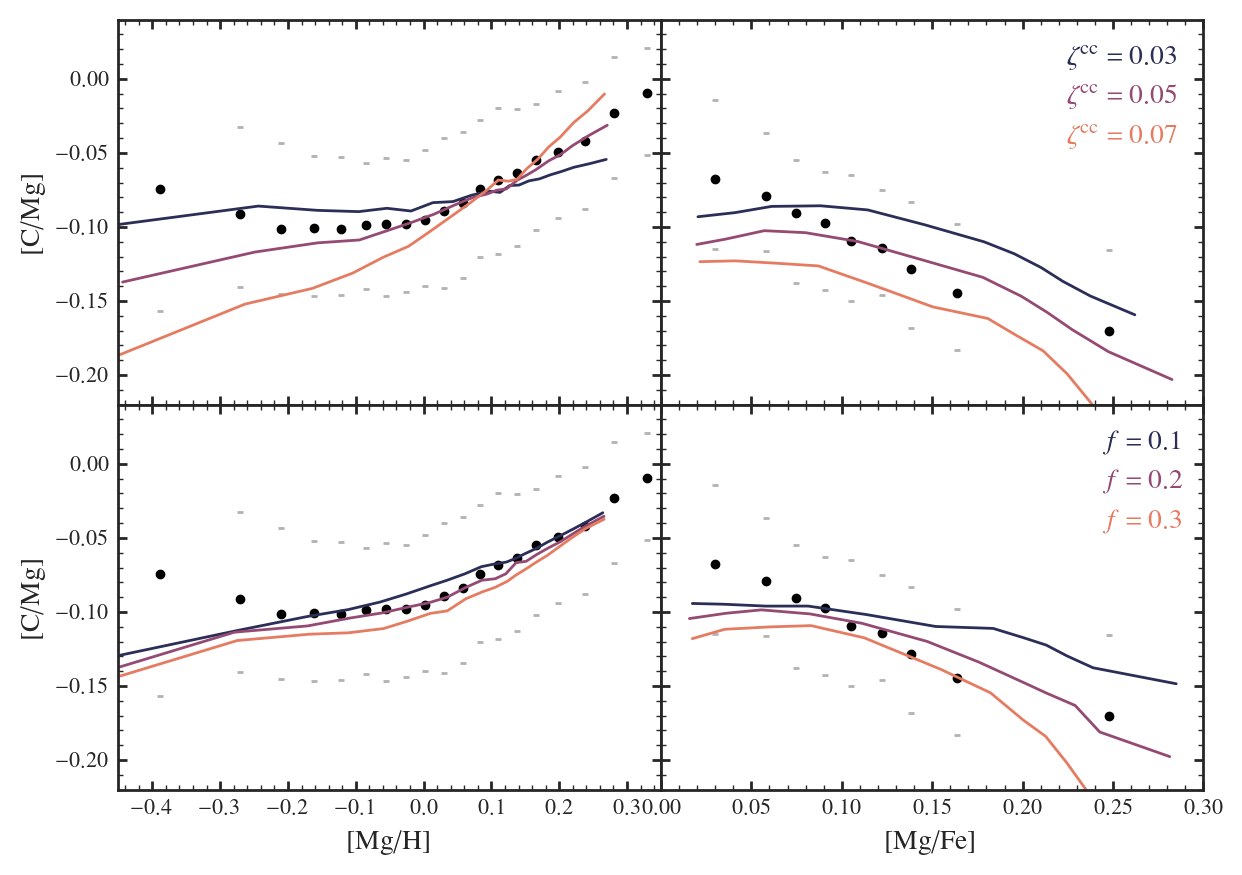

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex="col", sharey=True, gridspec_kw={"wspace": 0, "hspace": 0})


names = [
    "C11_f0.2_zeta0.03",
    "C11_f0.2_zeta0.05",
    "C11_f0.2_zeta0.07",
]
labels = [
    r"$\zeta^{\rm cc}=0.03$", 
    r"$\zeta^{\rm cc}=0.05$", 
    r"$\zeta^{\rm cc}=0.07$"
]

compare(names, labels, axs = axs[0], sequential=True)




names = [    
    "C11_f0.1",
    "C11_f0.2",
    "C11_f0.3",
  ]

labels = ["$f=0.1$", "$f=0.2$", "$f=0.3$"]
compare(names, labels, axs = axs[1], sequential=True)



plt.savefig("figures/sims_zeta_f.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FileNotFoundError: [Errno 2] No such file or directory: '../models/C11_f0.2_BiLin/stars.csv'

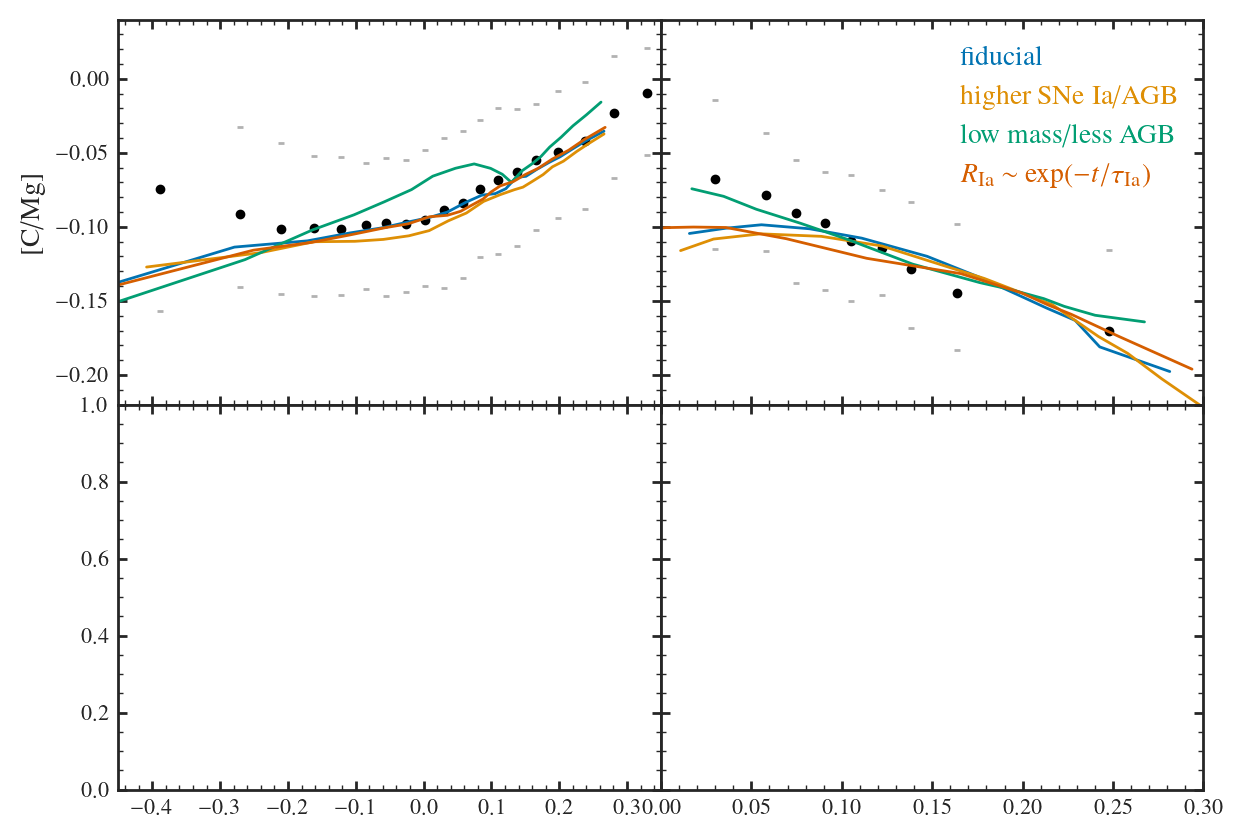

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex="col", sharey="row", gridspec_kw={"wspace": 0, "hspace": 0})


names = [
    "C11_f0.2",
    "C11_f0.3_fe_ia1.2",
    "C11_f0.1_m_factor1.5_no_negative",
    "C11_f0.2_RIaexp"

        ]

labels=["fiducial", r"higher SNe Ia/AGB", r"low mass/less AGB", r"$R_{\rm Ia} \sim \exp(-t/\tau_{\rm Ia})$"]
compare(names, labels, axs = axs[0])


names = [
    "C11_f0.2",
    "C11_f0.2_lateburst",
    "C11_f0.2_eta2.0",
    "C11_f0.2_BiLin",

        ]

labels=["fiducial", "lateburst", r"$y_X\rightarrow 2y_X$","low Z correction"]

compare(names, labels, axs = axs[1])


plt.savefig("figures/sims_degens.pdf")

In [ ]:
names = ["C11_f0.2",
        "C11_f0.2_RIaexp"]
labels = ["fiducial", "exp"]

compare_cooh(names, labels, y="MG_FE", ylim=(-0.1, 0.3), filt_ha=False)
plt.ylabel("[Mg/Fe]")

In [ ]:
names = ["C11_f0.2"]
labels = ["fiducial"]
compare(names, labels, y="C_N", ylim=(-0.3, 0.3))
plt.yticks()


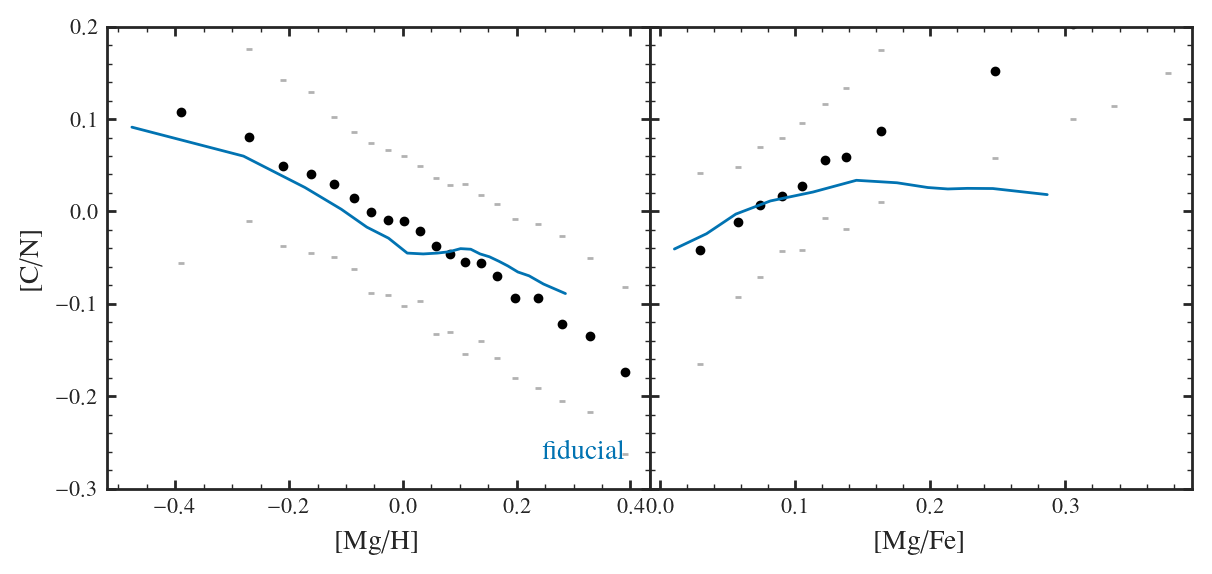

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex="col", sharey="row", gridspec_kw={"wspace": 0, "hspace": 0})


names = ["C11_f0.2"]
labels = ["fiducial"]

plt.sca(axs[0])
models = names_to_models(names)
zooh_models(models, labels, y="C_N")
plt.ylabel("[C/N]")
arya.Legend(loc="lower right", color_only=True)
plt.xlabel("[Mg/H]")
plt.ylim(-0.3, 0.2)

plt.sca(axs[1])
zofeo_models(models, labels, y="C_N", legend=False)
plt.xlabel("[Mg/Fe]")

plt.savefig("figures/c_n.pdf")

KeyError: 'N_MG_true'

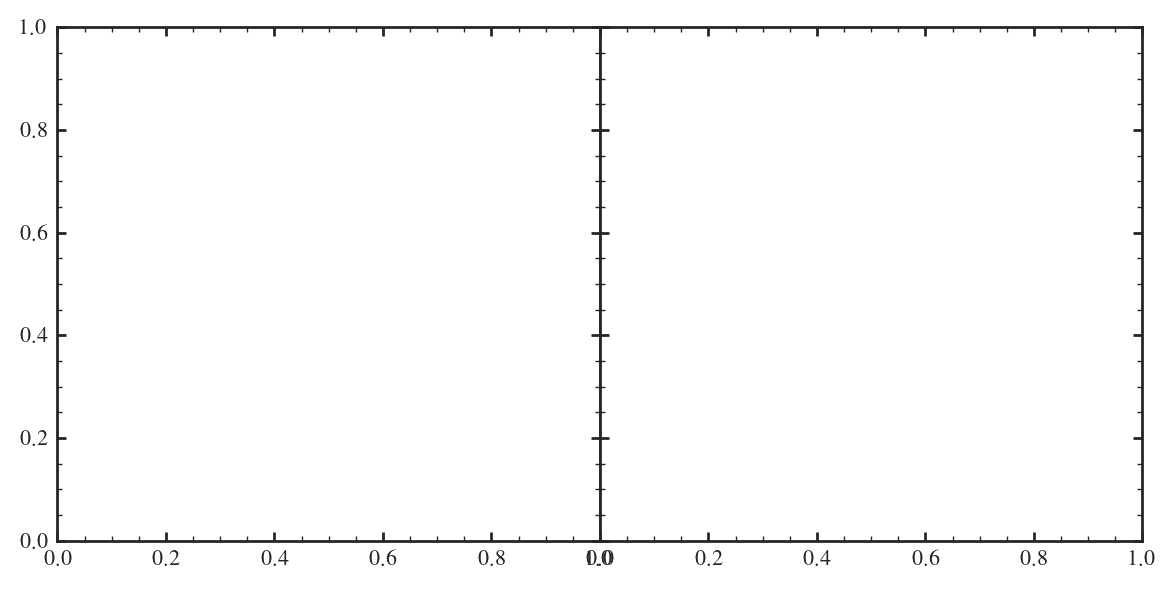

In [33]:
names = ["C11_f0.2",
        ]
labels = ["", "f"]


fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw=dict(wspace=0), figsize=(7, 10/3))

plt.sca(axs[0])

models = names_to_models(names)
zooh_models(models, labels, y="N_MG")

plt.xlabel("[Mg/H]")
plt.ylabel("[N/Mg]")
plt.xlim(-0.4)

plt.sca(axs[1])

models = names_to_models(names)
zofeo_models(models, labels, y="N_MG")

plt.xlabel("[Fe/Mg]")
plt.ylabel("[N/Mg]")

plt.ylim(-0.7, 0.3)

plt.savefig("figures/nitrogen.pdf")

# Misc verification

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


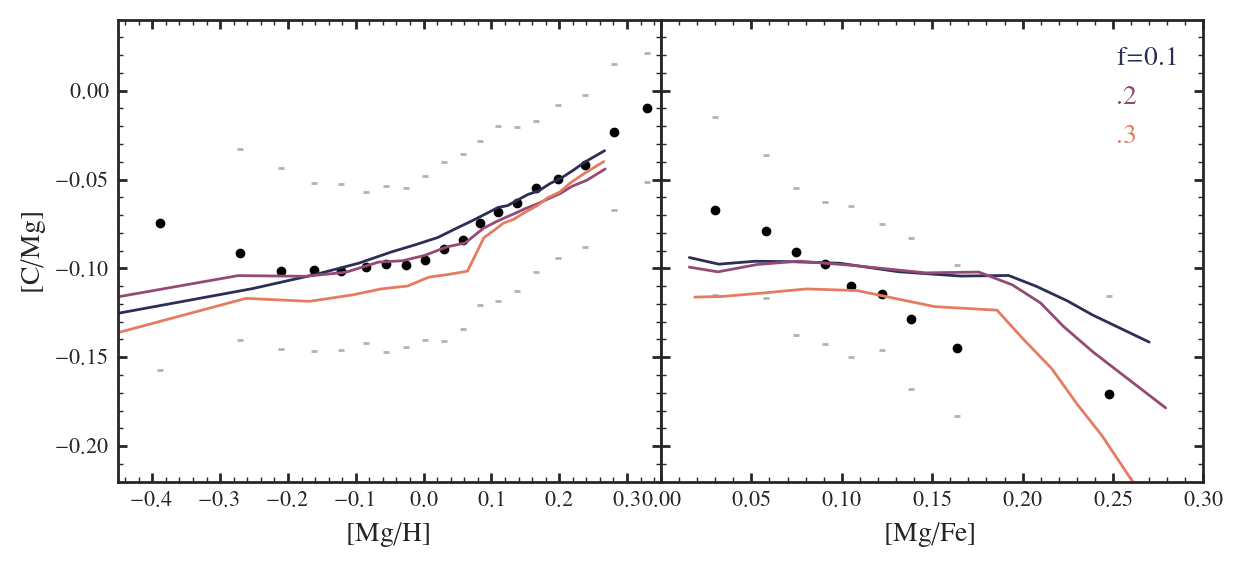

In [28]:
names = [
    "K16_f0.1",
    "K16_f0.2",
    "K16_f0.3"
]
labels = ["f=0.1", ".2", ".3"]
compare(names, labels, sequential=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


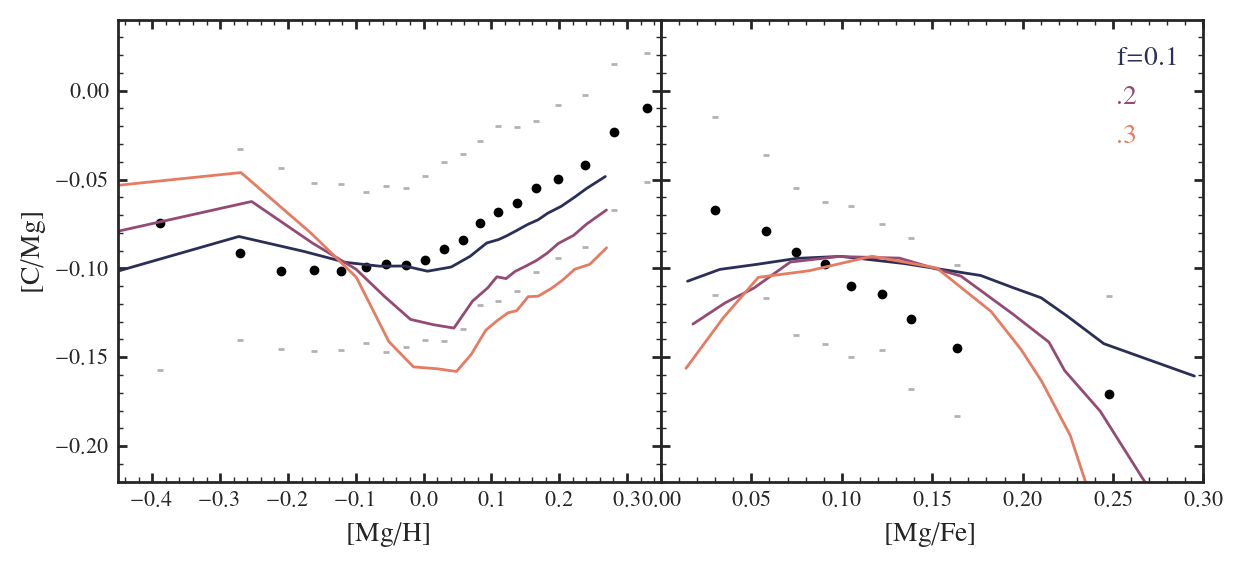

In [31]:
names = [
    "V13_f0.1",
    "V13_f0.2",
    "V13_f0.3"
]
labels = ["f=0.1", ".2", ".3"]
compare(names, labels, sequential=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


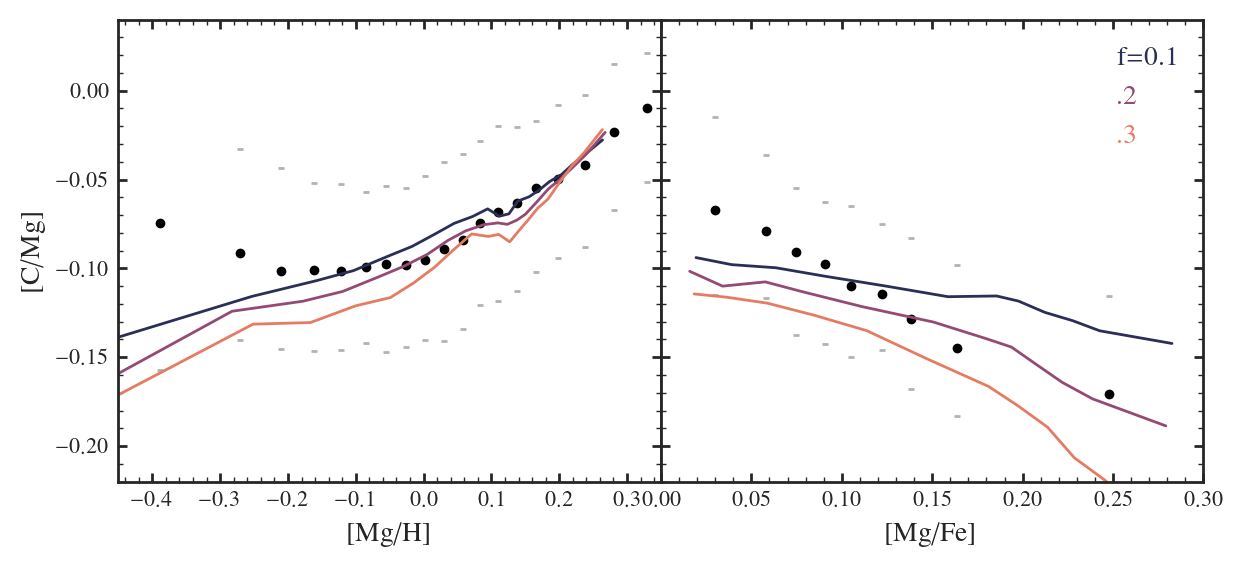

In [32]:
names = [
    "P16_f0.1",
    "P16_f0.2",
    "P16_f0.3"
]
labels = ["f=0.1", ".2", ".3"]
compare(names, labels, sequential=True)

KeyError: 'MG_H_true'

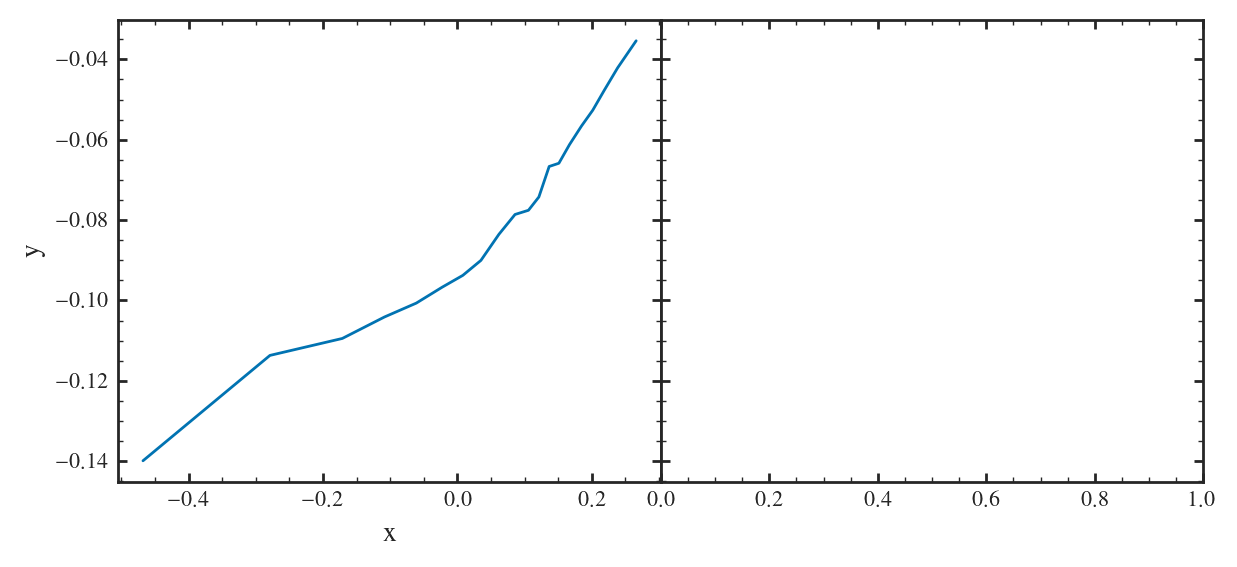

In [27]:
names = [    
    "C11_f0.2",
    "C11_f0.2_cc_modelLogLin"
  ]

labels = ["C11", "loglin",]

compare(names, labels)



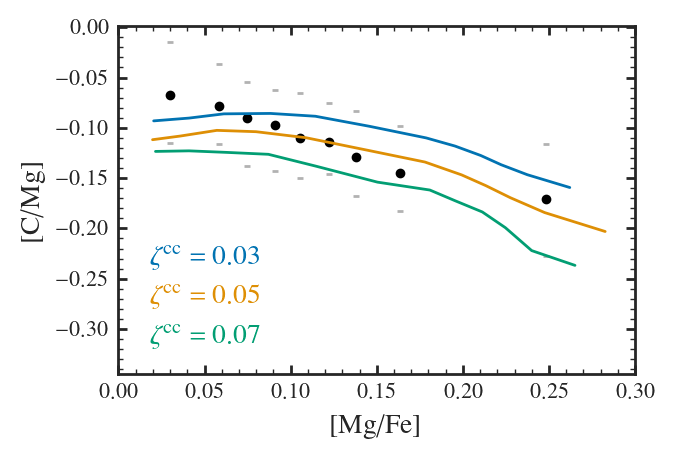

In [13]:
names = [
    "C11_f0.2_zeta0.03",
    "C11_f0.2_zeta0.05",
    "C11_f0.2_zeta0.07",
]
labels = [
    r"$\zeta^{\rm cc}=0.03$", 
    r"$\zeta^{\rm cc}=0.05$", 
    r"$\zeta^{\rm cc}=0.07$"
]

compare_coofe(names, labels)

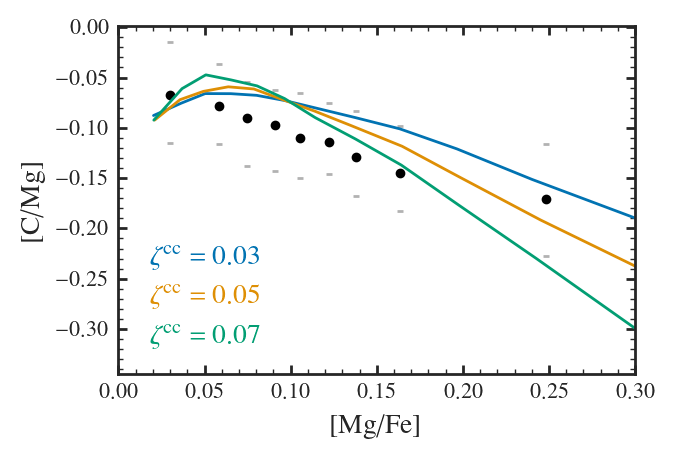

In [14]:
compare_coofe(names, labels, w=10)

FileNotFoundError: [Errno 2] No such file or directory: '../models/C11_f0.2_NP16/stars.csv'

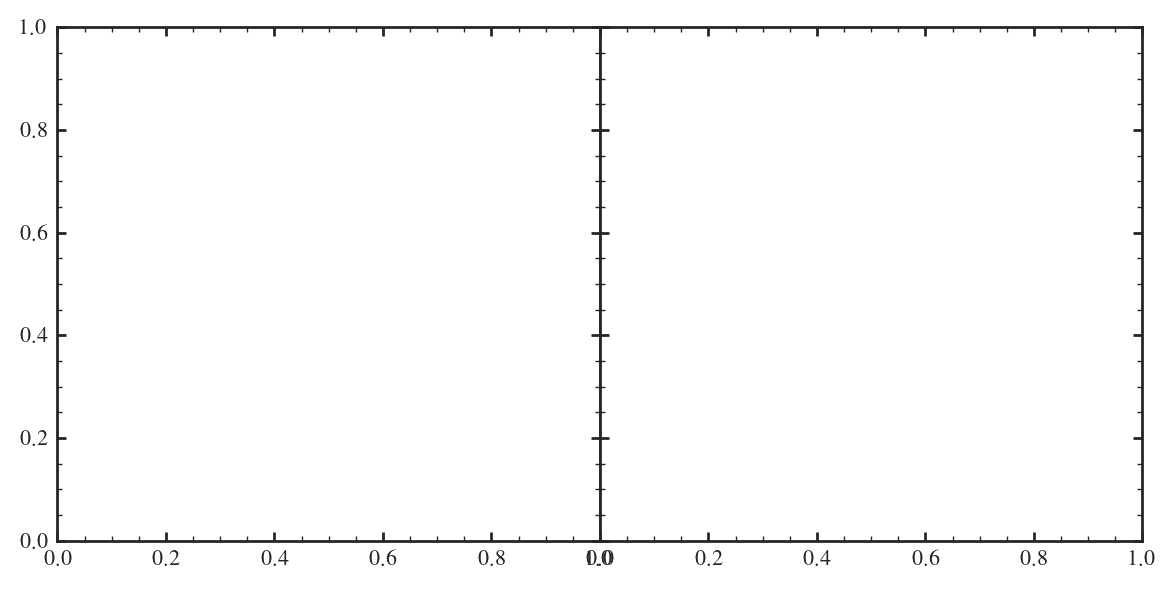

In [29]:
names = ["C11_f0.2",
    "C11_f0.2_NP16",
        ]
labels = ["Johnson+23", "R18", ]


fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw=dict(wspace=0), figsize=(7, 10/3))

plt.sca(axs[0])

models = names_to_models(names)
zooh_models(models, labels, y="N_MG")

plt.xlabel("[Mg/H]")
plt.ylabel("[N/Mg]")
plt.xlim(-0.4)

plt.sca(axs[1])

models = names_to_models(names)
zofeo_models(models, labels, y="N_MG")

plt.xlabel("[Fe/Mg]")
plt.ylabel("[N/Mg]")

plt.ylim(-0.5, 0.2)
plt.savefig("figures/n_j23_r18.pdf")

# Analytic models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


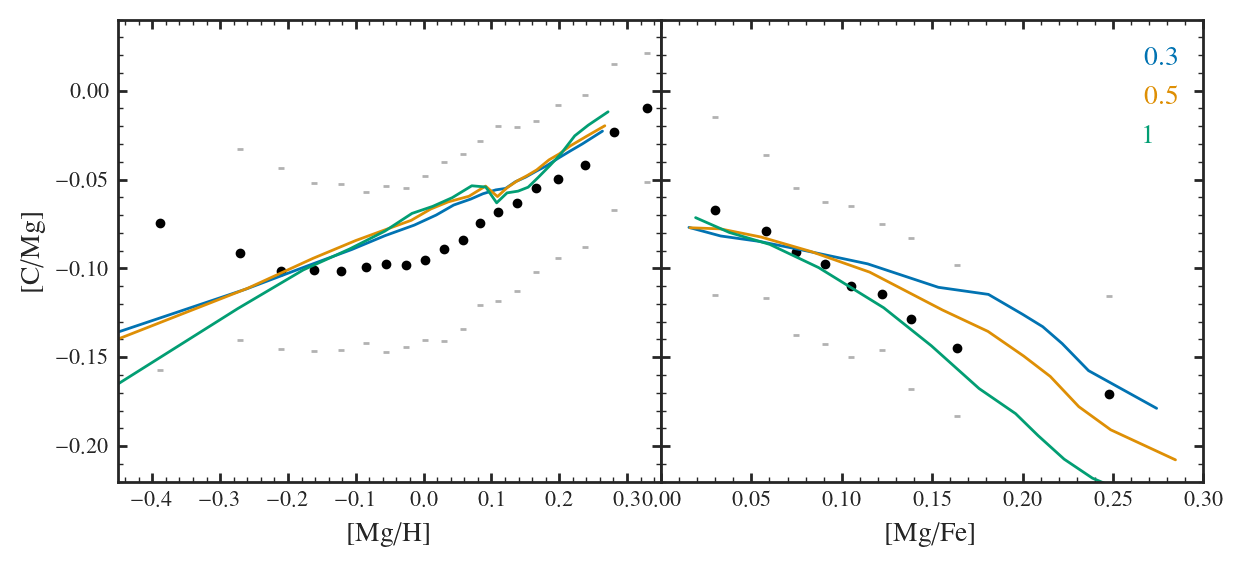

In [22]:
names = [
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.3/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.5/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb1.0/",

]

labels = ["tau_agb0.3", "0.5", "1"]
compare(names, labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


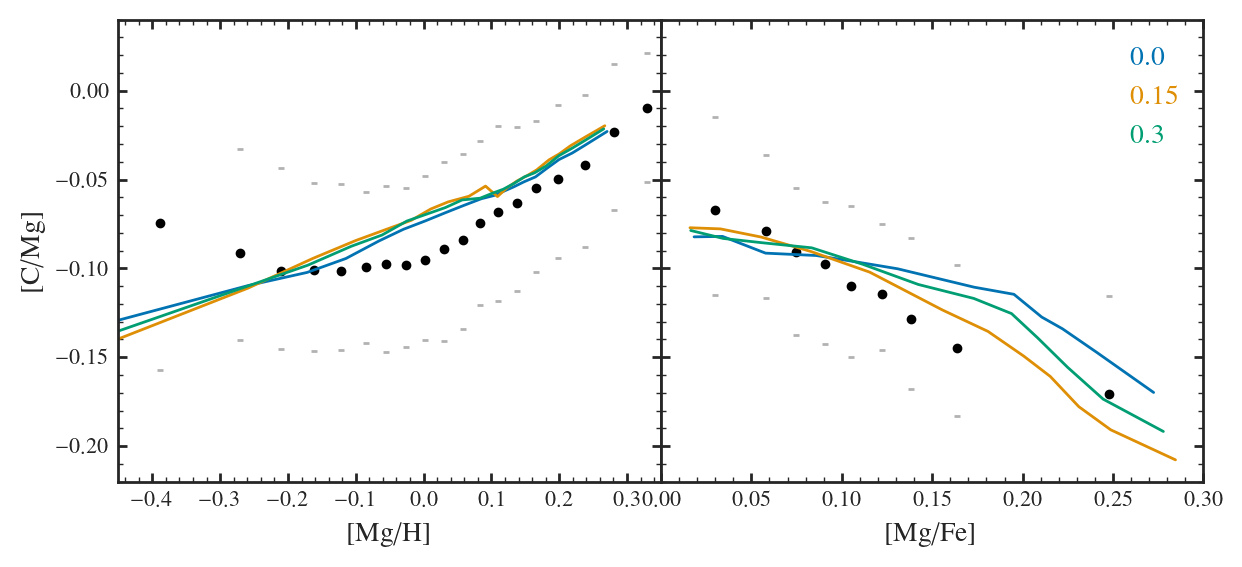

In [29]:
names = [
    "A_f0.2_zeta_agb-0.02_t_d0.0_tau_agb0.3/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.5/",
    "A_f0.2_zeta_agb-0.02_t_d0.3_tau_agb0.3/",
]

labels = ["0.0", "0.15", "0.3"]
compare(names, labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


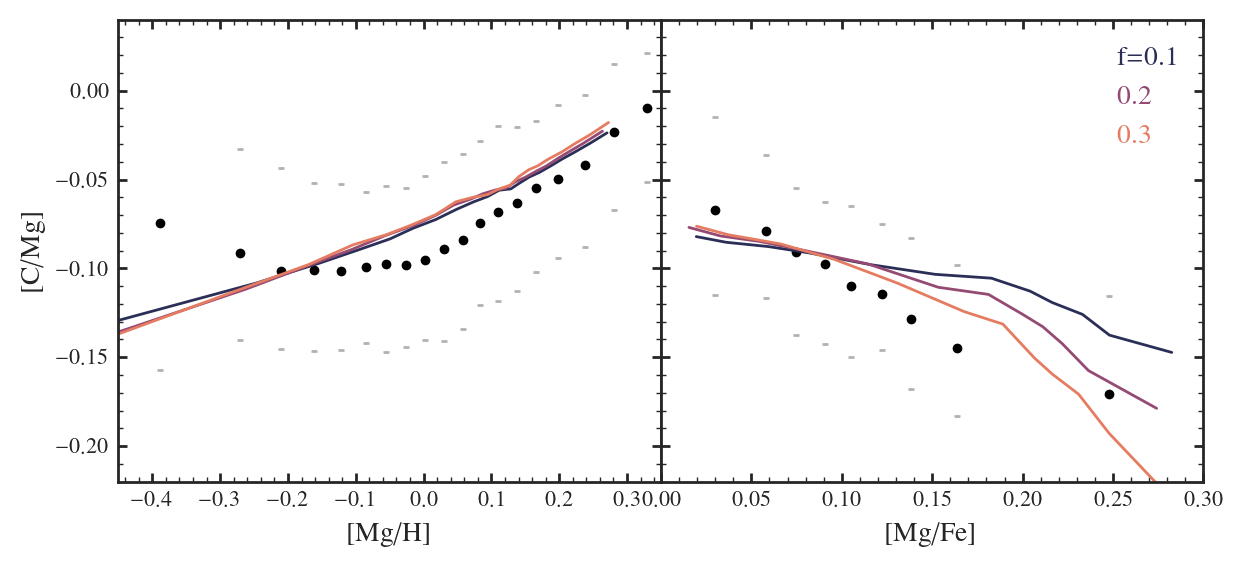

In [25]:
names = [
    "A_f0.1_zeta_agb-0.02_t_d0.15_tau_agb0.3/",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.3/",
    "A_f0.3_zeta_agb-0.02_t_d0.15_tau_agb0.3/",

]

labels = ["f=0.1", "0.2", "0.3"]
compare(names, labels, sequential=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


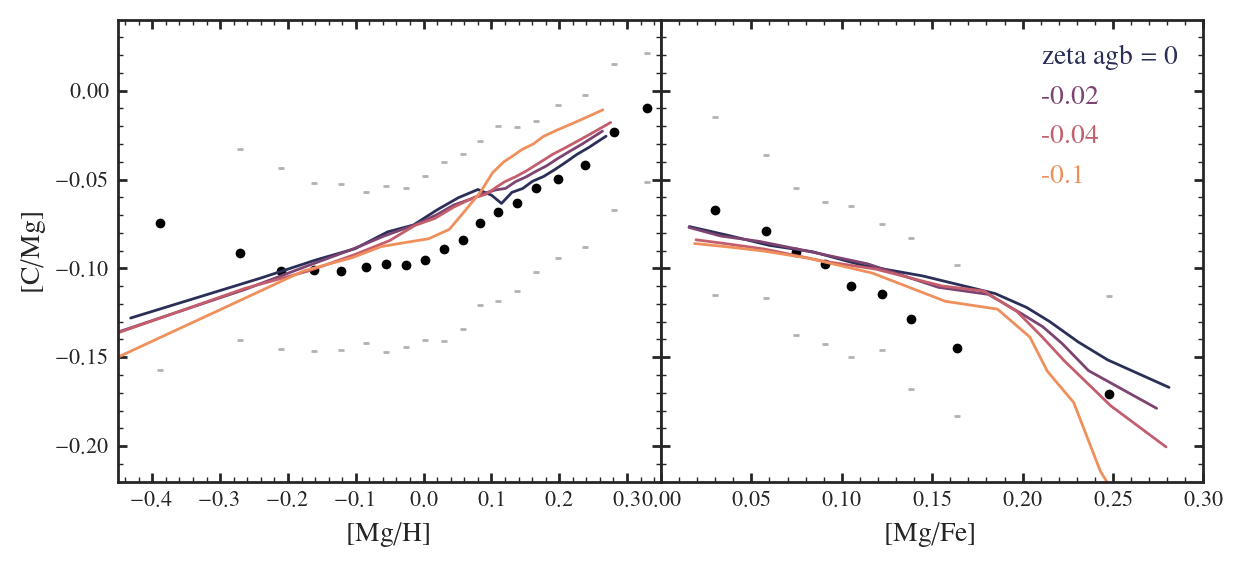

In [24]:
names = [    
    "A_f0.2_zeta_agb0.0_t_d0.15_tau_agb0.3",
    "A_f0.2_zeta_agb-0.02_t_d0.15_tau_agb0.3",
    "A_f0.2_zeta_agb-0.04_t_d0.15_tau_agb0.3",
    "A_f0.2_zeta_agb-0.1_t_d0.15_tau_agb0.3",
]

labels = ["zeta agb = 0", "-0.02", "-0.04", "-0.1"]
compare(names, labels, sequential=True)